#Colates, cleans and analyses canopy temperature data from Rain shelter barley trail

In [2]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ETFunctions as et
%matplotlib inline
import matplotlib.dates as mdates

In [3]:
Data = pd.read_pickle('.\DataFrames\TempAndMet.pkl')

In [4]:
Cultivars = ['Dash','Omaka']
Irrigations = ['High','Low','Mid']
Ic = 0.8
Icl = 0.9
Cp = 1013 #Heat capacity of air Joule/kg/oC
Albedo = 0.23
Lattitude = -43.38
LongitudeTZ = 185
LongitudeML = 360 - 172.28

In [5]:
TempDiff = Data.loc[:,'AirTemperature'].values - Data.loc[:,'IR_SurfaceTemp'] 
TempDiff = TempDiff * -1
CaseTempDiff =  Data.loc[:,'AirTemperature'].values - Data.loc[:,'IR_SensorBodyTemp']
CaseTempDiff = CaseTempDiff * -1

In [6]:
treatments = pd.MultiIndex.from_product([['High','Mid','Low'],['Dash','Omaka']])

In [7]:
styleFrame = pd.DataFrame(index=treatments,columns=['Col','Lin'],
            data =[('b','--'),('b','-'),('g','--'),('g','-'),('r','--'),('r','-')] )
styleFrame

Col Lin
High Dash    b  --
     Omaka   b   -
Mid  Dash    g  --
     Omaka   g   -
Low  Dash    r  --
     Omaka   r   -

In [8]:
TreatCombs = list(zip(TempDiff.columns.get_level_values(1),TempDiff.columns.get_level_values(0)))
TreatCombs

[('High', 'Dash'),
 ('High', 'Dash'),
 ('High', 'Dash'),
 ('High', 'Dash'),
 ('Low', 'Dash'),
 ('Low', 'Dash'),
 ('Low', 'Dash'),
 ('Low', 'Dash'),
 ('Mid', 'Dash'),
 ('Mid', 'Dash'),
 ('Mid', 'Dash'),
 ('Mid', 'Dash'),
 ('High', 'Omaka'),
 ('High', 'Omaka'),
 ('High', 'Omaka'),
 ('High', 'Omaka'),
 ('Low', 'Omaka'),
 ('Low', 'Omaka'),
 ('Low', 'Omaka'),
 ('Low', 'Omaka'),
 ('Mid', 'Omaka'),
 ('Mid', 'Omaka'),
 ('Mid', 'Omaka'),
 ('Mid', 'Omaka')]

In [9]:
colorCycle = [styleFrame.loc[x,'Col'] for x in TreatCombs]
print(colorCycle)
lineCycle = [styleFrame.loc[x,'Lin'] for x in TreatCombs]
print(lineCycle)

['b', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'g', 'g', 'g', 'g']
['--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']


## Look at treatment patterns of surface temp differential

## There are nice treatment and daily differences, how do they look within days

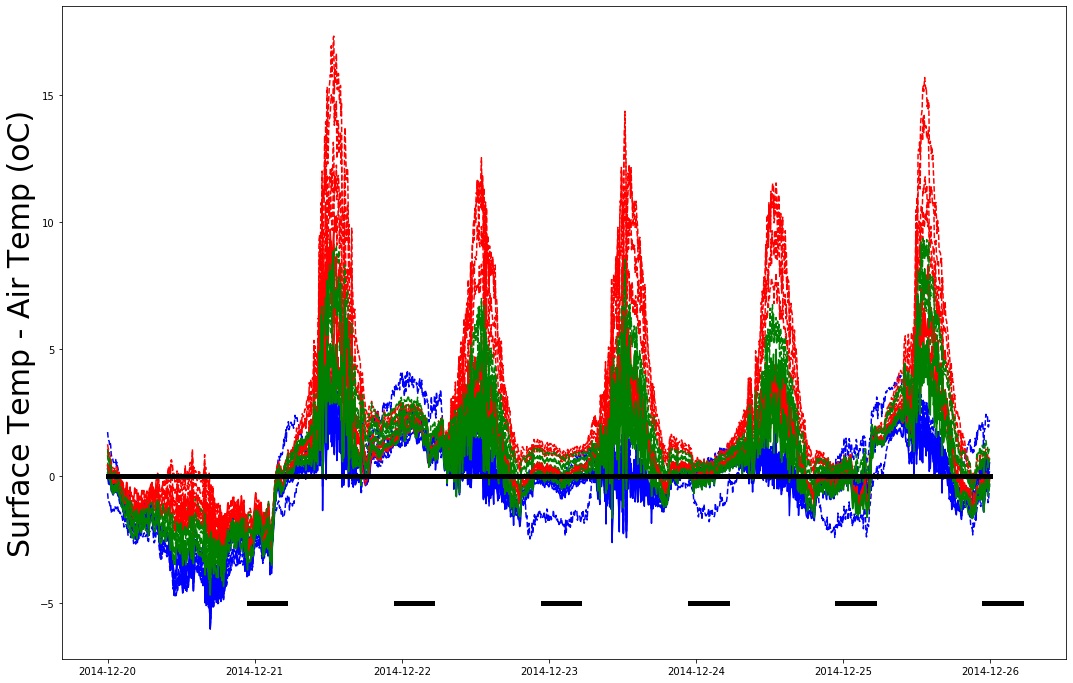

In [10]:
Figure = plt.figure(figsize=(18, 12))
ax = Figure.add_subplot(1,1,1)
ax.set_prop_cycle(color=colorCycle, linestyle=lineCycle)
plt.plot(TempDiff.loc['2014-12-20':'2014-12-25'])
plt.ylabel('Surface Temp - Air Temp (oC)', fontsize=30);
plt.plot(pd.to_datetime(['2014-12-20','2014-12-26']),[0,0],'-', c='k', linewidth=5)
plt.plot(pd.to_datetime(['2014-12-20 23:00','2014-12-21 5:00']),[-5,-5],'-', c='k', linewidth=5)
plt.plot(pd.to_datetime(['2014-12-21 23:00','2014-12-22 5:00']),[-5,-5],'-', c='k', linewidth=5)
plt.plot(pd.to_datetime(['2014-12-22 23:00','2014-12-23 5:00']),[-5,-5],'-', c='k', linewidth=5)
plt.plot(pd.to_datetime(['2014-12-23 23:00','2014-12-24 5:00']),[-5,-5],'-', c='k', linewidth=5)
plt.plot(pd.to_datetime(['2014-12-24 23:00','2014-12-25 5:00']),[-5,-5],'-', c='k', linewidth=5)
plt.plot(pd.to_datetime(['2014-12-25 23:00','2014-12-26 5:00']),[-5,-5],'-', c='k', linewidth=5)

#plt.plot(CanopyTempSample.index,CanopyTempSample)

### The temperature differences are comming mostly during the day time but they are non zero at night and some treatment differences remain so will will remove the night time data from our daily means

## Set up a mask for day-light hours and filter out all data after dark

### First look at the radiation data

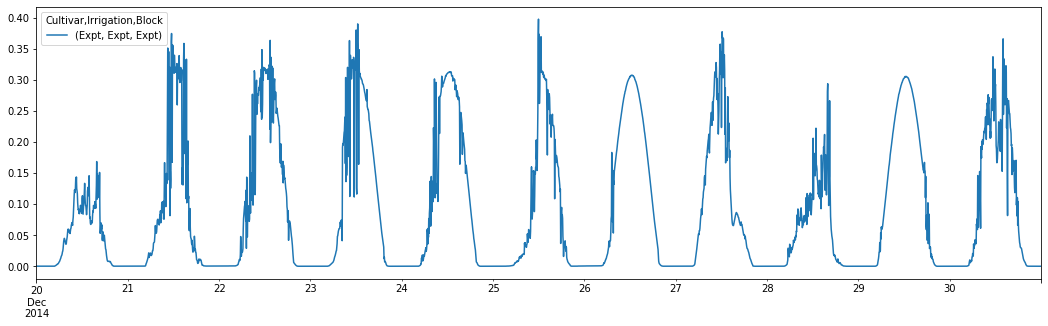

In [11]:
Data.IncomingRadnMJ.loc['2014-12-20':'2014-12-30'].plot(figsize=(18,5))
#plt.ylim(0,.01)

### Values less that 0.002 MJ/h can be treated as dark

### Create a tuple of the time stamps that have radiation > 0.002 MJ/h

In [12]:
DaylightIndex = Data.IncomingRadnMJ.where(Data.IncomingRadnMJ>0.002)
DaylightIndex.dropna(inplace=True)
DaylightIndex = DaylightIndex.index.tolist()

### Create temperature dataframes with daylight data

In [13]:
DayTimeTempDiff = TempDiff.loc[DaylightIndex,:]

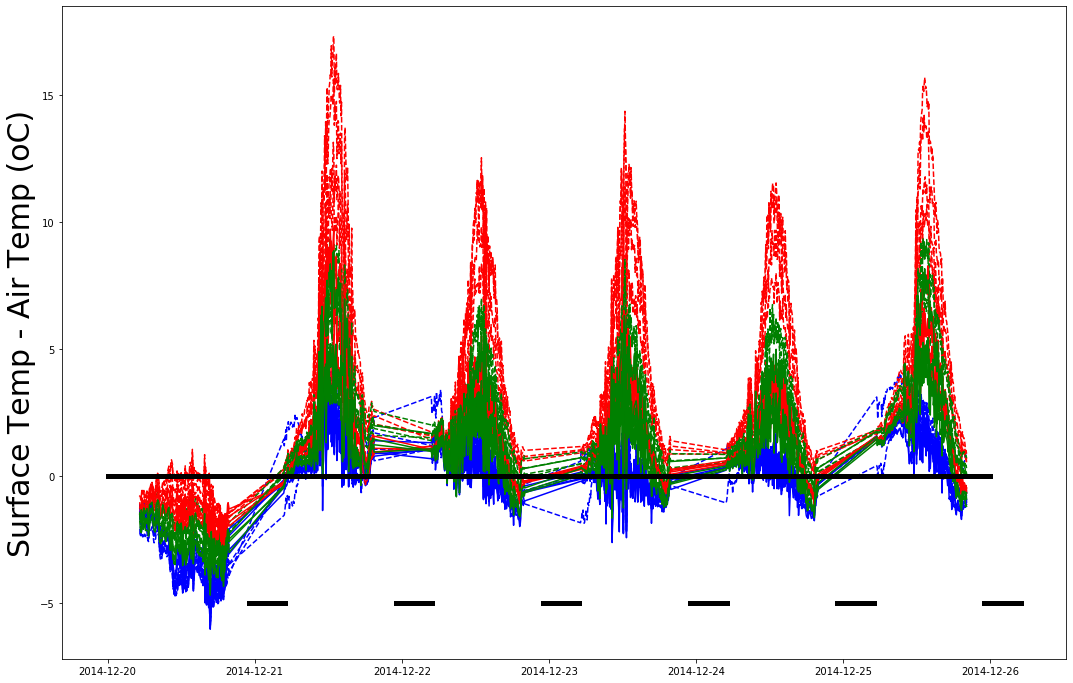

In [14]:
Figure = plt.figure(figsize=(18, 12))
ax = Figure.add_subplot(1,1,1)
ax.set_prop_cycle(color=colorCycle, linestyle=lineCycle)
plt.plot(DayTimeTempDiff.loc['2014-12-20':'2014-12-25'])
plt.ylabel('Surface Temp - Air Temp (oC)', fontsize=30);
plt.plot(pd.to_datetime(['2014-12-20','2014-12-26']),[0,0],'-', c='k', linewidth=5)
plt.plot(pd.to_datetime(['2014-12-20 23:00','2014-12-21 5:00']),[-5,-5],'-', c='k', linewidth=5)
plt.plot(pd.to_datetime(['2014-12-21 23:00','2014-12-22 5:00']),[-5,-5],'-', c='k', linewidth=5)
plt.plot(pd.to_datetime(['2014-12-22 23:00','2014-12-23 5:00']),[-5,-5],'-', c='k', linewidth=5)
plt.plot(pd.to_datetime(['2014-12-23 23:00','2014-12-24 5:00']),[-5,-5],'-', c='k', linewidth=5)
plt.plot(pd.to_datetime(['2014-12-24 23:00','2014-12-25 5:00']),[-5,-5],'-', c='k', linewidth=5)
plt.plot(pd.to_datetime(['2014-12-25 23:00','2014-12-26 5:00']),[-5,-5],'-', c='k', linewidth=5)

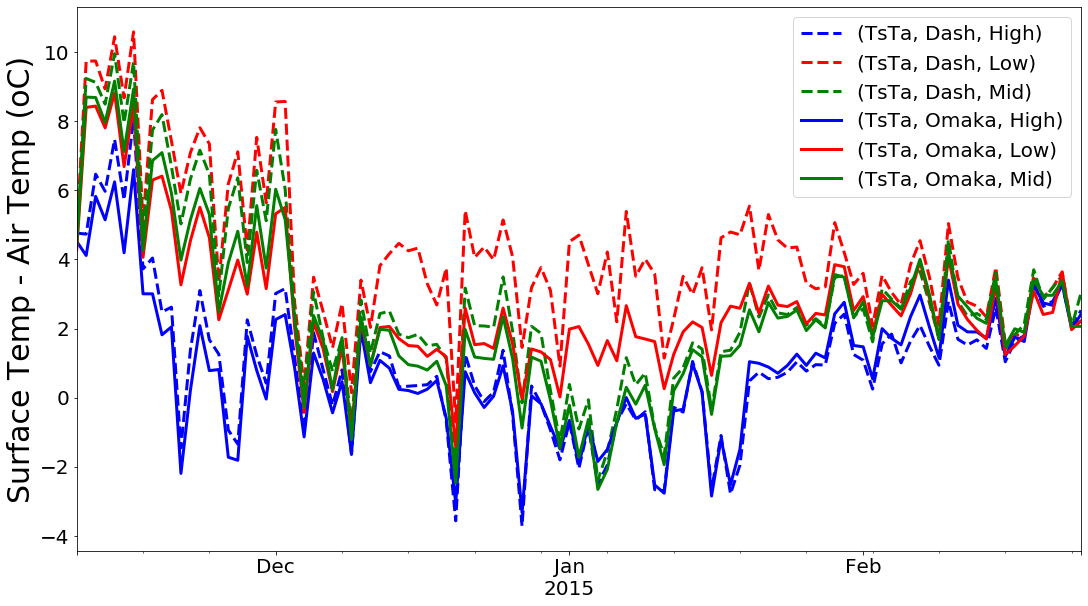

In [15]:
#Agregate data
DayTimeMeanTempDiff = DayTimeTempDiff.resample('D').mean()
DayTimeMeanTempDiff = DayTimeMeanTempDiff.groupby(level=['Cultivar','Irrigation'],axis=1).mean()
#Make index inculding measurement lable
tup = ['TsTa']
NewIndex = pd.MultiIndex.from_product([tup,Cultivars,Irrigations],names=['Measurement','Cultivar','Irrigation'])
#Attach new index to data frame
DayTimeMeanTempDiff.columns = NewIndex
#graph
DayTimeMeanTempDiff.loc['2014-11-10':,:].plot(fontsize = 20,figsize=(18,10), style=['b--','r--','g--','b-','r-','g-'],linewidth = 3)
plt.ylabel('Surface Temp - Air Temp (oC)', fontsize=30);
plt.legend(fontsize=20)

In [16]:
LowIrrIndex = pd.to_datetime('2014-12-02 00:00:00')
MidIrrIndex = pd.to_datetime(['2014-12-02 00:00:00','2014-12-23 00:00:00'])
HighIrrigIndex = pd.to_datetime(['2014-11-11 00:00:00',
 '2014-11-18 00:00:00',
 '2014-11-26 00:00:00',
 '2014-12-02 00:00:00',
 '2014-12-10 00:00:00',
 '2014-12-16 00:00:00',
 '2014-12-23 00:00:00',
 '2014-12-30 00:00:00',
 '2015-01-06 00:00:00',
 '2015-01-14 00:00:00'])

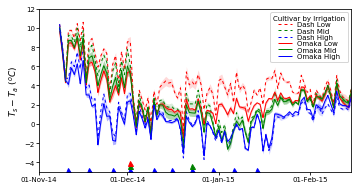

In [17]:
Graph = plt.figure(figsize=(5.6,3))
fig = Graph.add_subplot(1,1,1)
Cultivars = ['Dash','Omaka']
Irrigations = ['Low','Mid','High']
colors = ['r','g','b']
cultColors = ['w','w','r','b']
irrigColors = ['r','g','b','r','g','b']
cultLines = ['--','--','--','-','-','-']
gaps = [3,3,3,0.0001,0.0001,0.0001]
alphas = [0.15,0.15,0.15,0.3,0.3,0.3]

TsTaData = DayTimeTempDiff.loc['2014-11-7':].resample('d').mean()
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = TsTaData.loc[:,(Cul,Irr)].index
        Med = TsTaData.loc[:,(Cul,Irr)].mean(axis=1)
        SEM = TsTaData.loc[:,(Cul,Irr)].std(axis=1)/np.sqrt(3)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=alphas[CulPos],lw=0)
        plt.plot(Ind,Med,cultLines[CulPos],color=irrigColors[IrrPos],label = Cul + ' ' + Irr, linewidth=1,dashes = (3,gaps[CulPos]))
        IrrPos += 1
        CulPos+=1
plt.xlim(datetime.date(2014,11,1),datetime.date(2015,2,15))
plt.ylim(-5,12)
plt.ylabel('$T_s - T_a$ $(^oC)$', fontsize=9)
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.plot(HighIrrigIndex,list(-4.8 for x in range(len(HighIrrigIndex))),'^',c='b',markersize=5)
plt.plot(MidIrrIndex,[-4.4,-4.4],'^',c='g',markersize=5)
plt.plot(LowIrrIndex,[-4.1],'^',c='r',markersize=5)
plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=7,length = 3, direction = 'out', pad = 1)
plt.tick_params(axis='y', which='both', left=True,right=False, labelright=False,labelsize=7, length = 3, direction = 'out', pad = 1)

ledg = plt.legend(loc=1,numpoints=1,fontsize = 7,labelspacing = 0.05, 
                          title='Cultivar by Irrigation')
ledg.get_title().set_fontsize(7)

#Graph.savefig('Fig_2.jpg',dpi=1000)
#Graph.savefig('Fig_2.eps',dpi=1000)
Graph.savefig('Fig_2.png',dpi=1000)

In [ ]:
DayTimeMeanTempDiff.to_pickle('.\DataFrames\DayTimeMeanSurfaceTemp.pkl')

# Calculate surface temperature boundaries

## Upper limit for surface temperature depression (Ts-TaUL)

In [ ]:
Data[('TsTaUL','Expt','Expt','Expt')] = [et.TsTaUL(Data.loc[x,'Ra'][0],
                                  Ic,
                                  Data.loc[x,'RnW'][0],
                                  Data.loc[x,'q'][0],
                                  Cp) for x in Data.index]

In [ ]:
Data.TsTaUL.plot(figsize = (18,5))

## Lower limit for surface temperature depression (Ts-TaLL)

In [ ]:
Data[('TsTaLL','Expt','Expt','Expt')] = [et.TsTaLL(Data.loc[x,'Ra'][0],
                                  Icl,
                                  Data.loc[x,'RnW'][0],
                                  Data.loc[x,'q'][0],
                                  Cp,
                                  Data.loc[x,'gamma'][0],
                                  Data.loc[x,'delta'][0],
                                  Data.loc[x,'SatVP'][0],
                                  Data.loc[x,'VP'][0]) for x in Data.index]

In [ ]:
Data.TsTaLL.plot(figsize=(18,5))

In [ ]:
DayTimeTempBounds = Data.loc[DaylightIndex,Data.columns.isin(['TsTaLL','TsTaUL'],level=0)]

In [ ]:
DayTimeTempBounds.plot(figsize = (18,10))
DayTimeTempBounds.loc['2014-12-1':'2014-12-5'].plot(figsize = (18,10))

In [ ]:
DayTimeMeanTempDiffBounds = DayTimeTempBounds.resample('D', how='mean')
DayTimeMeanTempDiffBounds.loc['2014-11-10':,:].plot(fontsize = 20,figsize=(18,10), style=['b--','b-','r--','r-','g--','g-'],linewidth = 3)
plt.ylabel('Air Temp - Air Surface (oC)', fontsize=30);
plt.legend(fontsize=20)

In [ ]:
DayTimeMeanTempDiff = DayTimeMeanTempDiff.join(DayTimeMeanTempDiffBounds)
DayTimeMeanTempDiff.loc['2014-11-10':,:].plot(fontsize = 20,figsize=(18,10), style=['b--','r--','g--','b-','r-','g-','k--','k-'],linewidth = 3)
plt.ylabel('Air Temp - Air Surface (oC)', fontsize=30);
plt.legend(fontsize=20)

In [ ]:
Ta = Data.loc[DaylightIndex,'AirTemperature'].resample('D').mean()
To =  np.add(DayTimeMeanTempDiff,Ta)

In [ ]:
plt.plot(To.TsTaLL,To.loc[:,('TsTa','Dash','High')],'o')
plt.plot([10,30],[10,30])
plt.ylabel('To (for Dash High irrig)')
plt.xlabel('ToLL (from Jackson)')

Everything looks to be working but the boundries are not right at the start.  This is because the crop does not have full cover and the aerodynamic resistance should be higher.

# Bring in LAI data and use the make Ra dynamic

## Set up LAI Dataframe

In [ ]:
LaiObsDates = pd.to_datetime(['2014-11-02',
'2014-11-10',
'2014-11-13',
'2014-11-17',
'2014-11-20',
'2014-11-24',
'2014-11-27',
'2014-12-02',
'2014-12-05',
'2014-12-08',
'2014-12-12',
'2014-12-16',
'2014-12-18',
'2014-12-23',
'2015-01-06',
'2015-01-08',
'2015-01-14',
'2015-01-16',
'2015-01-19',
'2015-01-22',
'2015-01-26',
'2015-01-29',
'2015-02-04',
'2015-02-10',
'2015-02-25'])

LAIData= [(0.0, 0.00, 0.00, 0.00, 0.00, 0.00),
(0.20, 0.16, 0.22, 0.27, 0.29, 0.31),
(0.27, 0.24, 0.33, 0.44, 0.55, 0.49),
(0.76, 0.50, 0.52, 1.01, 0.94, 0.81),
(1.21, 0.77, 0.82, 1.77, 1.48, 1.24),
(2.17, 1.24, 1.10, 3.23, 2.18, 1.92),
(2.61, 1.17, 1.05, 3.57, 2.30, 1.93),
(3.60, 1.41, 1.37, 4.56, 2.54, 2.21),
(3.58, 1.67, 1.54, 5.09, 3.25, 2.45),
(3.73, 1.97, 1.63, 5.39, 3.68, 2.92),
(3.84, 2.12, 1.99, 6.08, 3.94, 3.21),
(4.78, 2.49, 2.32, 6.60, 4.42, 4.24),
(4.86, 2.76, 2.61, 7.53, 4.71, 4.35),
(4.57, 2.57, 2.58, 6.85, 4.28, 4.54),
(5.05, 2.15, 2.97, 8.03, 3.47, 5.25),
(5.22, 2.23, 3.14, 8.16, 3.21, 5.19),
(4.82, 1.40, 2.55, 5.57, 2.03, 4.49),
(5.21, 0.88, 2.56, 5.15, 1.34, 4.13),
(4.49, 0.69, 1.57, 4.24, 0.73, 2.11),
(4.24, 0.00, 1.40, 3.57, 0.00, 1.49),
(3.69, 0.00, 1.04, 2.90, 0.00, 0.78),
(2.05, 0.00, 0.29, 1.14, 0.00, 0.16),
(0.00, 0.00, 0.00, 0.00, 0.00, 0.00),
(0.00, 0.00, 0.00, 0.00, 0.00, 0.00),
(0.00, 0.00, 0.00, 0.00, 0.00, 0.00)]

LAIcolumns=[('LAI','Dash','High'),
           ('LAI','Dash','Mid'),
           ('LAI','Dash','Low'),
           ('LAI','Omaka','High'),
           ('LAI','Omaka','Mid'),
           ('LAI','Omaka','Low')]

LAIcolumnsMI = pd.MultiIndex.from_tuples(LAIcolumns,names=('Measurement','Cultivar','Irrigation'))

LAIDF = pd.DataFrame(data=LAIData, index = LaiObsDates, columns=LAIcolumnsMI)

##Set up ThermalTime 

In [ ]:
MeanTemp = Data[('AirTemperature','Expt','Expt','Expt')].resample('D').mean().to_frame()
MeanTemp.columns = MeanTemp.columns.droplevel(3)
MeanTemp.AirTemperature.fillna(10,inplace=True)
MeanTemp[('AcummTT','Expt','Expt')]= MeanTemp['AirTemperature'].cumsum()

##Join with LAI data and extrapolate LAI to daily values using TT

In [ ]:
LAIData = MeanTemp.join(LAIDF)

In [ ]:
Dates = LAIData.loc[:,('LAI','Dash','High')].dropna().index
for x in range(6):
    xarray = LAIData.loc[Dates,('AcummTT','Expt','Expt')].values
    yarray = LAIData.loc[Dates,LAIcolumns[x]].values
    LAIData.loc[:,LAIcolumns[x]] = np.interp(LAIData.loc[:,'AcummTT'],xarray,yarray)

In [ ]:
LAIData.LAI.plot(fontsize = 20, figsize=(18,10),style=['b--','r--','g--','b-','r-','g-'],linewidth = 3)
plt.ylabel('LAI', fontsize = 20)

## Estimate height from LAI

In [ ]:
HeightColumns=[('Height','Dash','High'),
           ('Height','Dash','Mid'),
           ('Height','Dash','Low'),
           ('Height','Omaka','High'),
           ('Height','Omaka','Mid'),
           ('Height','Omaka','Low')]

In [ ]:
def estHeight(LAI,col):
    Height = []
    for x in range(LAI.index.size):
        if LAI.index[x] < datetime.datetime(2015,1,1,0,0):
            HeightGuess = LAIData.loc[:,LAIcolumns[col]].values[x] * 0.12
        else:
            HeightGuess = LAIData.loc['2015-1-1',LAIcolumns[col]] * 0.12
        Height.append(HeightGuess)
    return Height

In [ ]:
for x in range(6):
    LAIData.loc[:,HeightColumns[x]] = estHeight(LAIData.loc[:,LAIcolumns[x]],x)

In [ ]:
LAIData.Height.plot(fontsize = 20, figsize=(18,10),style=['b--','r--','g--','b-','r-','g-'],linewidth = 3)
plt.ylabel('Height (m)', fontsize = 20)



##Update Ra estimates using height data

In [ ]:
for Cultivar in Cultivars:
    for Irrigation in Irrigations:
        Data[('RaTreat',Cultivar,Irrigation,'Mean')] = [et.Ra(Data.loc[x,'Windspeed'][0],
                                                    1.2,
                                                    LAIData.loc[x.date(),
                                                    ('Height',Cultivar,Irrigation)]) for x in Data.index]       

In [ ]:
Data.RaTreat.plot(figsize = (18,10))

##Update TsTaUL and TsTaLL calculations for each treatment

In [ ]:
for Cultivar in Cultivars:
    for Irrigation in Irrigations:
        Data[('TsTaULTreat',Cultivar,Irrigation,'Mean')] = [et.TsTaUL(Data.loc[x,('RaTreat',Cultivar,Irrigation)][0],
                                  Ic,
                                  Data.loc[x,'RnW'][0],
                                  Data.loc[x,'q'][0],
                                  Cp) for x in Data.index]

In [ ]:
Data.TsTaULTreat.plot(figsize=(18,10))

In [ ]:
for Cultivar in Cultivars:
    for Irrigation in Irrigations:
        Data[('TsTaLLTreat',Cultivar,Irrigation,'Mean')] = [et.TsTaLL(Data.loc[x,('RaTreat',Cultivar,Irrigation)][0],
                                  Icl,
                                  Data.loc[x,'RnW'][0],
                                  Data.loc[x,'q'][0],
                                  Cp,
                                  Data.loc[x,'gamma'][0],
                                  Data.loc[x,'delta'][0],
                                  Data.loc[x,'SatVP'][0],
                                  Data.loc[x,'VP'][0]) for x in range(Data.index.size)]

In [ ]:
Data.TsTaLLTreat.plot(figsize=(18,10))

In [ ]:
DayTimeTreatTempBounds = Data.loc[DaylightIndex,Data.columns.isin(['TsTaLLTreat','TsTaULTreat'],level=0)]
DayTimeMeanTreatTempBounds = DayTimeTreatTempBounds.resample('D', how='mean')
DayTimeMeanTreatTempBounds.loc['2014-11-10':,:].plot(fontsize = 20,figsize=(18,10), style=['b--','r--','g--','b-','r-','g-','b--','r--','g--','b-','r-','g-'],linewidth = 3)
plt.ylabel('Surface Temp - Air Temp (oC)', fontsize=30);
plt.legend(fontsize=20)

In [ ]:
Export = Data.loc[DaylightIndex,Data.columns.isin(['TsTaLLTreat','TsTaULTreat'],level=0)]
Export.to_pickle('.\DataFrames\TsBoundData.pkl')

In [ ]:
DayTimeTempData = DayTimeMeanTreatTempBounds.join(DayTimeMeanTempDiff)

In [ ]:
Figure = plt.figure(figsize=(18,40))

Position = 1
for Irrigation in Irrigations:
    for Cultivar in Cultivars:
        Figure.add_subplot(6,2,Position)
#         plt.plot(DayTimeTempData.index,DayTimeTempData.loc[:,('TsTaULTreat',Cultivar,Irrigation)], '-',color = 'r', label = 'Ts-TaUL')
#         plt.plot(DayTimeTempData.index,DayTimeTempData.loc[:,('TsTaLLTreat',Cultivar,Irrigation,'Mean')], '-',color = 'b', label = 'Ts-TaLL')
#         plt.plot(DayTimeTempData.index,DayTimeTempData.loc[:,('TsTa',Cultivar,Irrigation,'Mean')], '-',color = 'k', label = 'Ts-Ta')
#         plt.legend(loc=1, fontsize = 16)
#         plt.title(Cultivar + ' ' + Irrigation, fontsize = 20)
#         plt.ylabel('Ts-Ta (oC)')
        Position +=1

In [ ]:
for Irrigation in Irrigations:
    for Cultivar in Cultivars:
        DayTimeTempData.loc[:,('CWSI',Cultivar,Irrigation)] = \
        [(DayTimeTempData.loc[x,('TsTa',Cultivar,Irrigation)] \
          - DayTimeTempData.loc[x,('TsTaLLTreat',Cultivar,Irrigation)]) / \
         (DayTimeTempData.loc[x,('TsTaULTreat',Cultivar,Irrigation)] \
          - DayTimeTempData.loc[x,('TsTaLLTreat',Cultivar,Irrigation)]) for x in range(DayTimeTempData.index.size)]

In [ ]:
DayTimeTempData.CWSI.plot(figsize=(18,10),  style=['b--','b-','r--','r-','g--','g-'])